In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def read_csv_files():
    data = []
    for root, dirs, files in os.walk('results'):
        for file in files:
            if file.endswith("locust_results_stats.csv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                parts = root.split(os.sep)
                if len(parts) >= 3:
                    environment = parts[-3]
                    cache_status = parts[-2]
                    user_count = parts[-1]
                    df['Ambiente'] = environment
                    df['StatusCache'] = cache_status
                    df['ContagemUsuarios'] = user_count
                    data.append(df)
                else:
                    print(f"Pular arquivo {file_path} devido à estrutura de caminho inesperada.")
    return pd.concat(data, ignore_index=True)

In [20]:
def generate_plots(df):
    # Converter ContagemUsuarios para numérico
    df['ContagemUsuarios'] = pd.to_numeric(df['ContagemUsuarios'])

    # Gráfico de Tempo Médio de Resposta por Contagem de Usuários
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='ContagemUsuarios', y='Average Response Time', hue='Ambiente', style='StatusCache', markers=True, dashes=False)
    plt.title('Tempo Médio de Resposta por Contagem de Usuários')
    plt.xlabel('Número de Usuários')
    plt.ylabel('Tempo Médio de Resposta (ms)')
    plt.legend(title='Ambiente / Status do Cache')
    plt.grid(True)
    plt.savefig('tempo_medio_resposta.png')
    plt.show()

    # Gráfico de Requisições por Segundo por Contagem de Usuários
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='ContagemUsuarios', y='Requests/s', hue='Ambiente', style='StatusCache', markers=True, dashes=False)
    plt.title('Requisições por Segundo por Contagem de Usuários')
    plt.xlabel('Número de Usuários')
    plt.ylabel('Requisições por Segundo')
    plt.legend(title='Ambiente / Status do Cache')
    plt.grid(True)
    plt.savefig('requisicoes_por_segundo.png')
    plt.show()

Pular arquivo results\locust_results_stats.csv devido à estrutura de caminho inesperada.


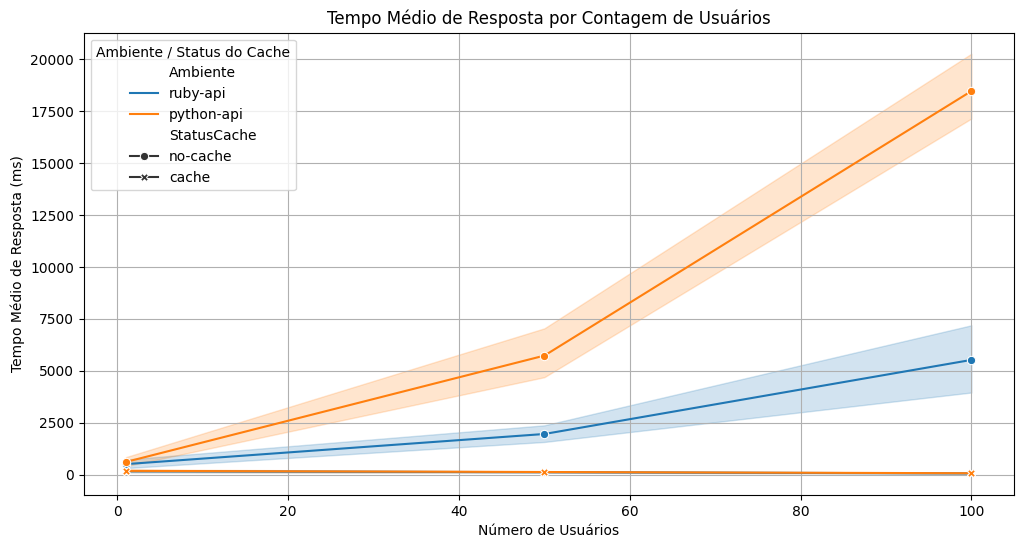

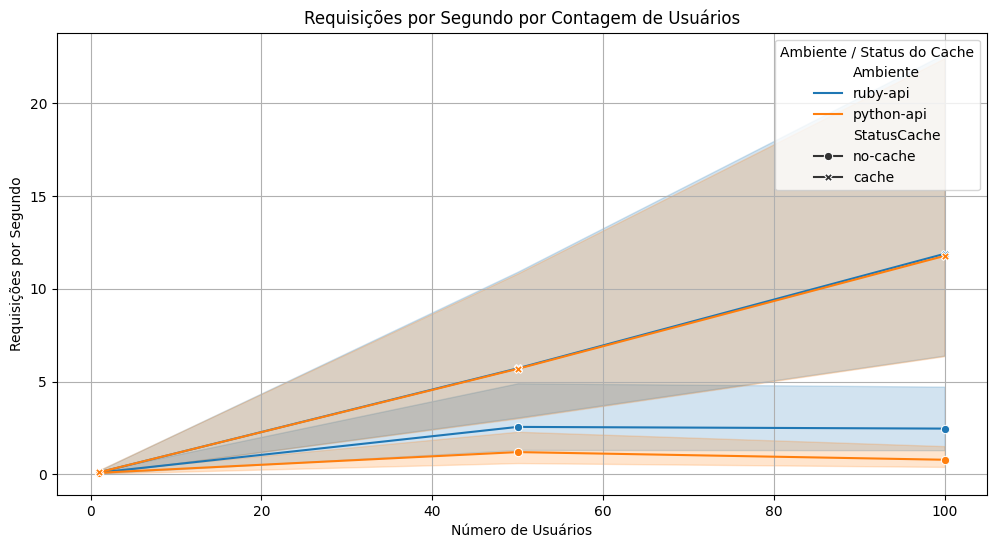

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,90%,95%,98%,99%,99.9%,99.99%,100%,Ambiente,StatusCache,ContagemUsuarios
0,GET,/?url=https%3A%2F%2Fnews.yahoo.com%2F,4,0,1100.000000,1103.645346,869.386790,1329.864262,46320.50000,0.068021,...,1300,1300,1300,1300,1300,1300,1300,ruby-api,no-cache,1
1,GET,/?url=https%3A%2F%2Fwww.bbc.com%2Fportuguese,4,0,51.000000,52.628215,42.207772,58.990328,20640.00000,0.068021,...,59,59,59,59,59,59,59,ruby-api,no-cache,1
2,GET,/?url=https%3A%2F%2Fwww.cnnbrasil.com.br%2F,6,0,300.000000,513.054546,294.921994,1006.360014,46916.00000,0.102032,...,1000,1000,1000,1000,1000,1000,1000,ruby-api,no-cache,1
3,GET,/?url=https%3A%2F%2Fwww.estadao.com.br%2F,3,0,300.000000,319.428236,269.774155,392.100669,66903.00000,0.051016,...,390,390,390,390,390,390,390,ruby-api,no-cache,1
4,GET,/?url=https%3A%2F%2Fwww.folha.uol.com.br%2F,2,0,75.026758,158.633468,75.026758,242.240179,92228.00000,0.034011,...,240,240,240,240,240,240,240,ruby-api,no-cache,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,GET,/?url=https%3A%2F%2Fwww.globo.com%2F,168,0,18.000000,127.163418,16.069839,5601.313593,47941.00000,2.845468,...,21,22,3600,4600,5600,5600,5600,python-api,cache,50
126,GET,/?url=https%3A%2F%2Fwww.r7.com%2F,176,0,17.000000,98.232031,15.093699,4599.631811,28651.00000,2.980966,...,19,20,1600,4600,4600,4600,4600,python-api,cache,50
127,GET,/?url=https%3A%2F%2Fwww.terra.com.br%2Fnoticia...,165,0,19.000000,96.270628,16.540196,4604.081529,79268.00000,2.794656,...,21,23,53,4600,4600,4600,4600,python-api,cache,50
128,GET,/?url=https%3A%2F%2Fwww.uol.com.br%2F,186,0,19.000000,43.617009,16.773271,4597.446197,83293.00000,3.150339,...,21,22,23,24,4600,4600,4600,python-api,cache,50


In [25]:
df = read_csv_files()
generate_plots(df)
df